In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
df = pd.read_csv("../data/model_trained_coffee.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df.head()

,date,datetime,cash_type,card,money,coffee_name,time_30min,time_of_day,hour_float_30min,day_of_week,...,hour_sin,hour_cos,is_weekend,is_morning,is_afternoon,is_evening,morning_cold,evening_cold,weekend_morning,coffee_category
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01 10:30:00,10:30:00,10.5,4,...,0.382683,-0.923880,0,1,0,0,0,0,0,Leite e Doces
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01 12:30:00,12:30:00,12.5,4,...,-0.130526,-0.991445,0,0,1,0,0,0,0,Leite e Doces
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01 12:30:00,12:30:00,12.5,4,...,-0.130526,-0.991445,0,0,1,0,0,0,0,Leite e Doces
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03-01 14:00:00,14:00:00,14.0,4,...,-0.500000,-0.866025,0,0,1,0,0,0,0,Cafe Preto
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03-01 14:00:00,14:00:00,14.0,4,...,-0.500000,-0.866025,0,0,1,0,0,0,0,Leite e Doces


In [5]:
features = [
    "hour_float_30min", "hour_sin", "hour_cos", 
    "day_of_week", "month", 
    "weather", "cash_type", 
    "is_weekend", "is_morning", "is_afternoon", "is_evening",
    "morning_cold", "evening_cold", "weekend_morning"
]

X = df[features].copy()
features

['hour_float_30min',
 'hour_sin',
 'hour_cos',
 'day_of_week',
 'month',
 'weather',
 'cash_type',
 'is_weekend',
 'is_morning',
 'is_afternoon',
 'is_evening',
 'morning_cold',
 'evening_cold',
 'weekend_morning']

In [6]:
num_features = ["hour_float_30min", "hour_sin", "hour_cos", "day_of_week", "month"]
cat_features = [f for f in features if f not in num_features]

In [7]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
])

In [ ]:
X_processed = preprocessor.fit_transform(X)

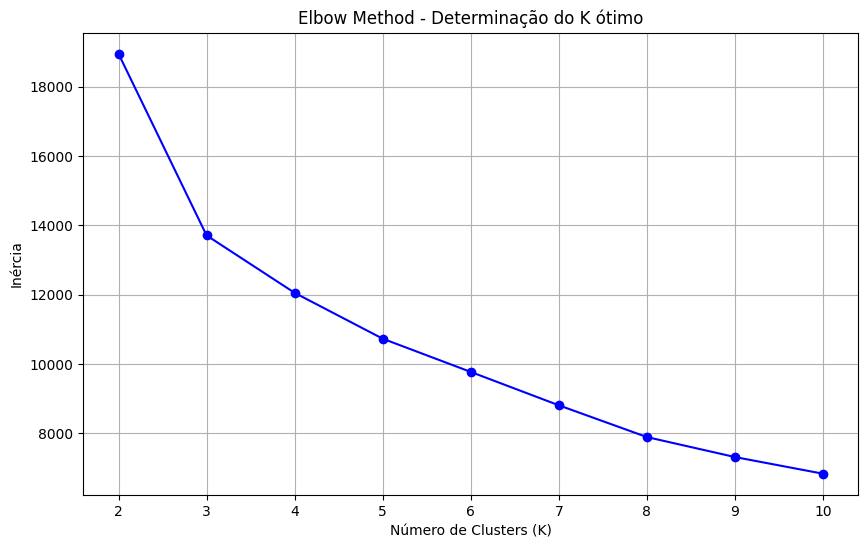

Inércias por K:
K=2: Inércia=18954.92
K=3: Inércia=13709.69
K=4: Inércia=12051.40
K=5: Inércia=10727.16
K=6: Inércia=9768.00
K=7: Inércia=8804.56
K=8: Inércia=7887.23
K=9: Inércia=7310.34
K=10: Inércia=6829.10


In [9]:
k_range = range(2, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Elbow Method - Determinação do K ótimo')
plt.grid(True)
plt.show()

print("Inércias por K:")
for k, inertia in zip(k_range, inertias):
    print(f"K={k}: Inércia={inertia:.2f}")

In [10]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores.append(score)

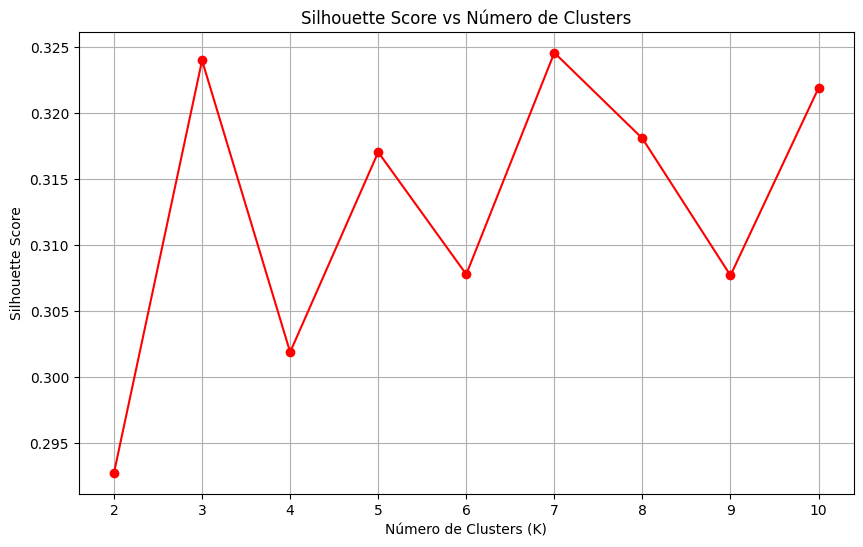

Silhouette Scores por K:
K=2: Score=0.2928
K=3: Score=0.3240
K=4: Score=0.3019
K=5: Score=0.3170
K=6: Score=0.3078
K=7: Score=0.3246
K=8: Score=0.3181
K=9: Score=0.3077
K=10: Score=0.3219

K ótimo (maior Silhouette Score): 7


In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Número de Clusters')
plt.grid(True)
plt.show()

print("Silhouette Scores por K:")
for k, score in zip(k_range, silhouette_scores):
    print(f"K={k}: Score={score:.4f}")

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK ótimo (maior Silhouette Score): {optimal_k}")

In [12]:
k_optimal = optimal_k  

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_processed)

df['cluster'] = cluster_labels

print(f"Modelo treinado com K={k_optimal}")
print(f"\nDistribuição dos clusters:")
print(df['cluster'].value_counts().sort_index())

Modelo treinado com K=7

Distribuição dos clusters:
cluster
0    597
1    990
2    450
3    617
4    227
5    475
6    280
Name: count, dtype: int64


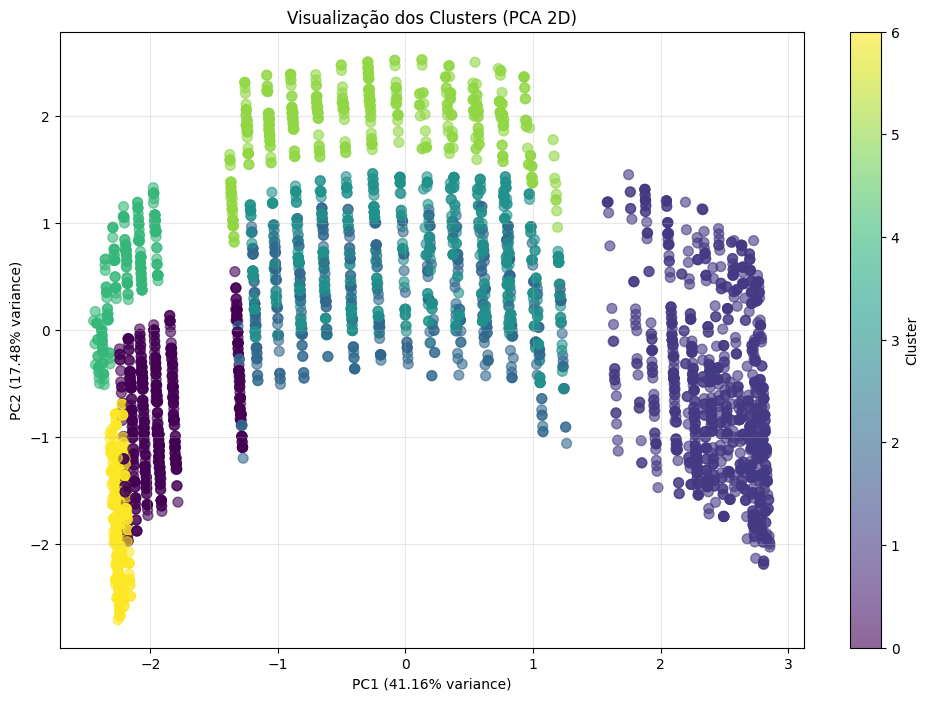

Variância: PC1=41.16%, PC2=17.48%


In [13]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Visualização dos Clusters (PCA 2D)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Variância: PC1={pca.explained_variance_ratio_[0]:.2%}, "
      f"PC2={pca.explained_variance_ratio_[1]:.2%}")

In [15]:
cluster_analysis = df.groupby('cluster').agg({
    'hour_float_30min': 'mean',
    'day_of_week': 'mean',
    'month': 'mean',
    'is_weekend': 'mean',
    'is_morning': 'mean',
    'is_afternoon': 'mean',
    'is_evening': 'mean',
}).round(2)

print(cluster_analysis)

         hour_float_30min  day_of_week  month  is_weekend  is_morning  \
cluster                                                                 
0                   10.36         1.93   6.31        0.00        0.84   
1                   20.09         2.72   6.81        0.22        0.00   
2                   14.54         1.98   9.60        0.00        0.00   
3                   15.13         2.03   2.95        0.00        0.00   
4                    9.86         5.48   7.17        1.00        1.00   
5                   14.31         5.44   6.34        1.00        0.00   
6                    8.28         1.93   6.99        0.00        1.00   

         is_afternoon  is_evening  
cluster                            
0                0.00         0.0  
1                0.00         1.0  
2                0.92         0.0  
3                0.90         0.0  
4                0.00         0.0  
5                0.87         0.0  
6                0.00         0.0  


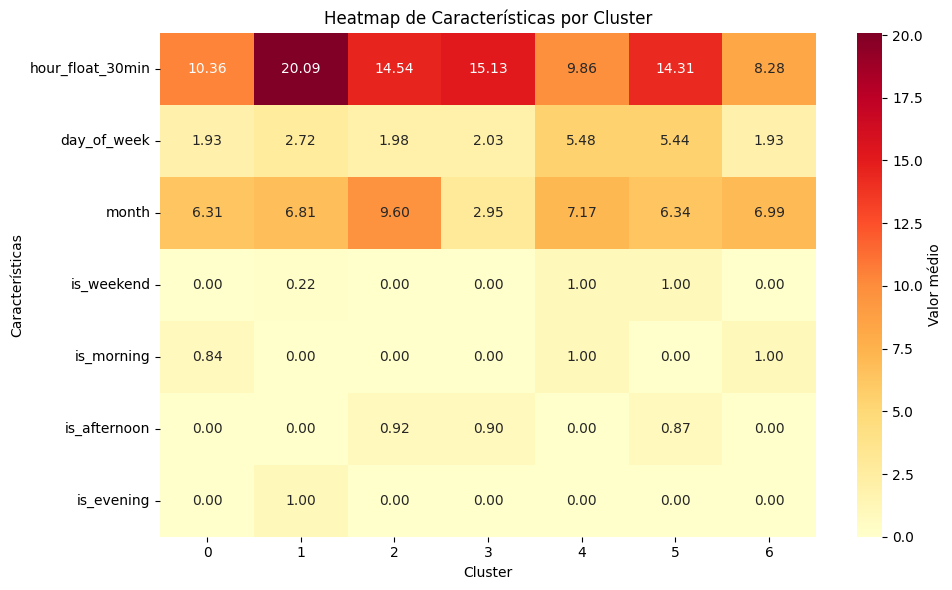

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_analysis.T, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Valor médio'})
plt.title('Características por Cluster')
plt.ylabel('Características')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

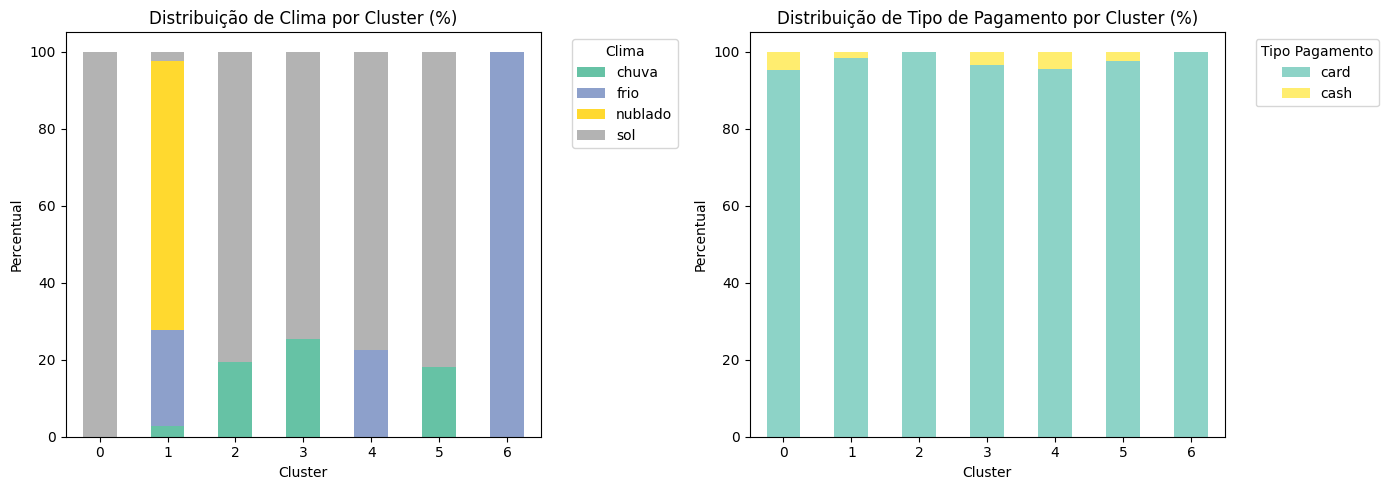

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

weather_cluster = pd.crosstab(df['cluster'], df['weather'], normalize='index') * 100
weather_cluster.plot(kind='bar', ax=axes[0], stacked=True, colormap='Set2')
axes[0].set_title('Distribuição de Clima por Cluster (%)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percentual')
axes[0].legend(title='Clima', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=0)

cash_cluster = pd.crosstab(df['cluster'], df['cash_type'], normalize='index') * 100
cash_cluster.plot(kind='bar', ax=axes[1], stacked=True, colormap='Set3')
axes[1].set_title('Distribuição de Tipo de Pagamento por Cluster (%)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Percentual')
axes[1].legend(title='Tipo Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

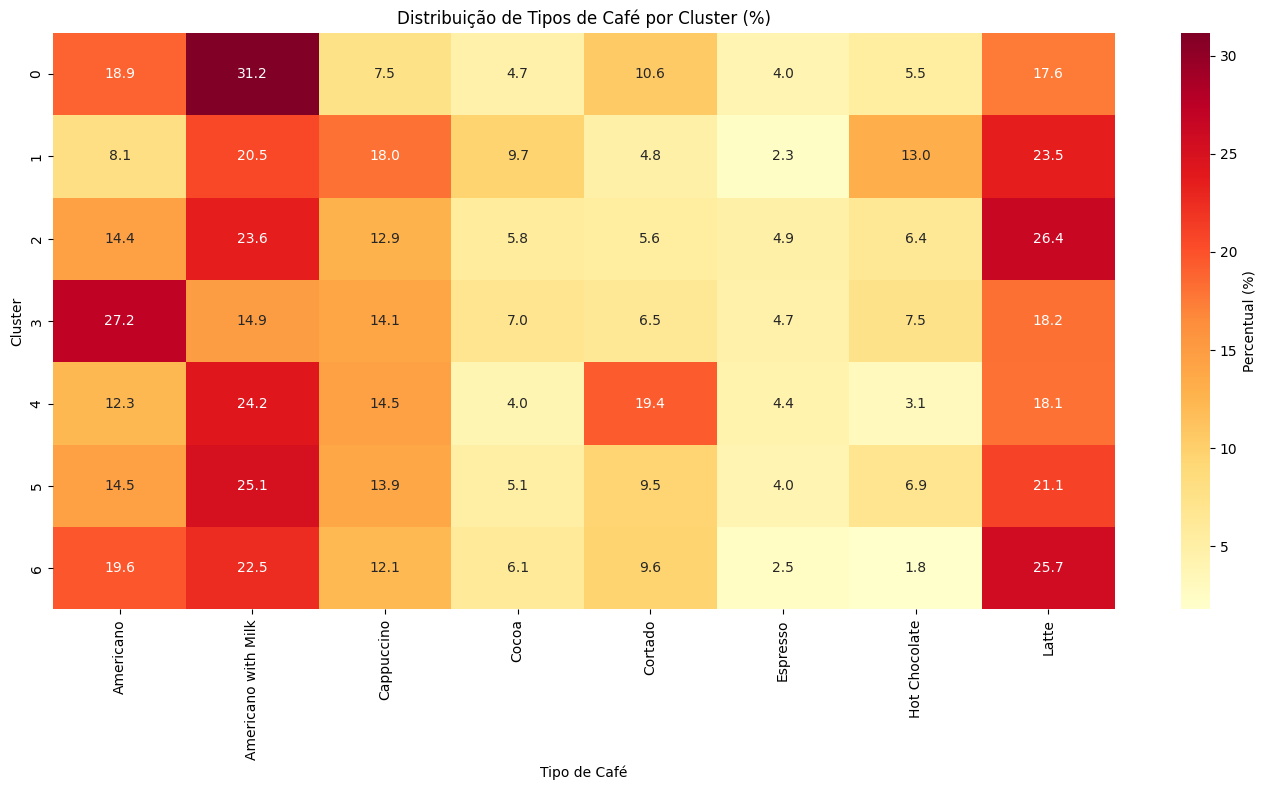

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
cluster                                                                   
0                  113                  186          45     28       63   
1                   80                  203         178     96       48   
2                   65                  106          58     26       25   
3                  168                   92          87     43       40   
4                   28                   55          33      9       44   
5                   69                  119          66     24       45   
6                   55                   63          34     17       27   

coffee_name  Espresso  Hot Chocolate  Latte  
cluster                                      
0                  24             33    105  
1                  23            129    233  
2                  22             29    119  
3                  29             46    112  
4                  10              7     41  
5 

In [19]:
coffee_cluster = pd.crosstab(df['cluster'], df['coffee_name'], normalize='index') * 100

plt.figure(figsize=(14, 8))
sns.heatmap(coffee_cluster, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentual (%)'})
plt.title('Distribuição de Tipos de Café por Cluster (%)')
plt.ylabel('Cluster')
plt.xlabel('Tipo de Café')
plt.tight_layout()
plt.show()

print(pd.crosstab(df['cluster'], df['coffee_name']))

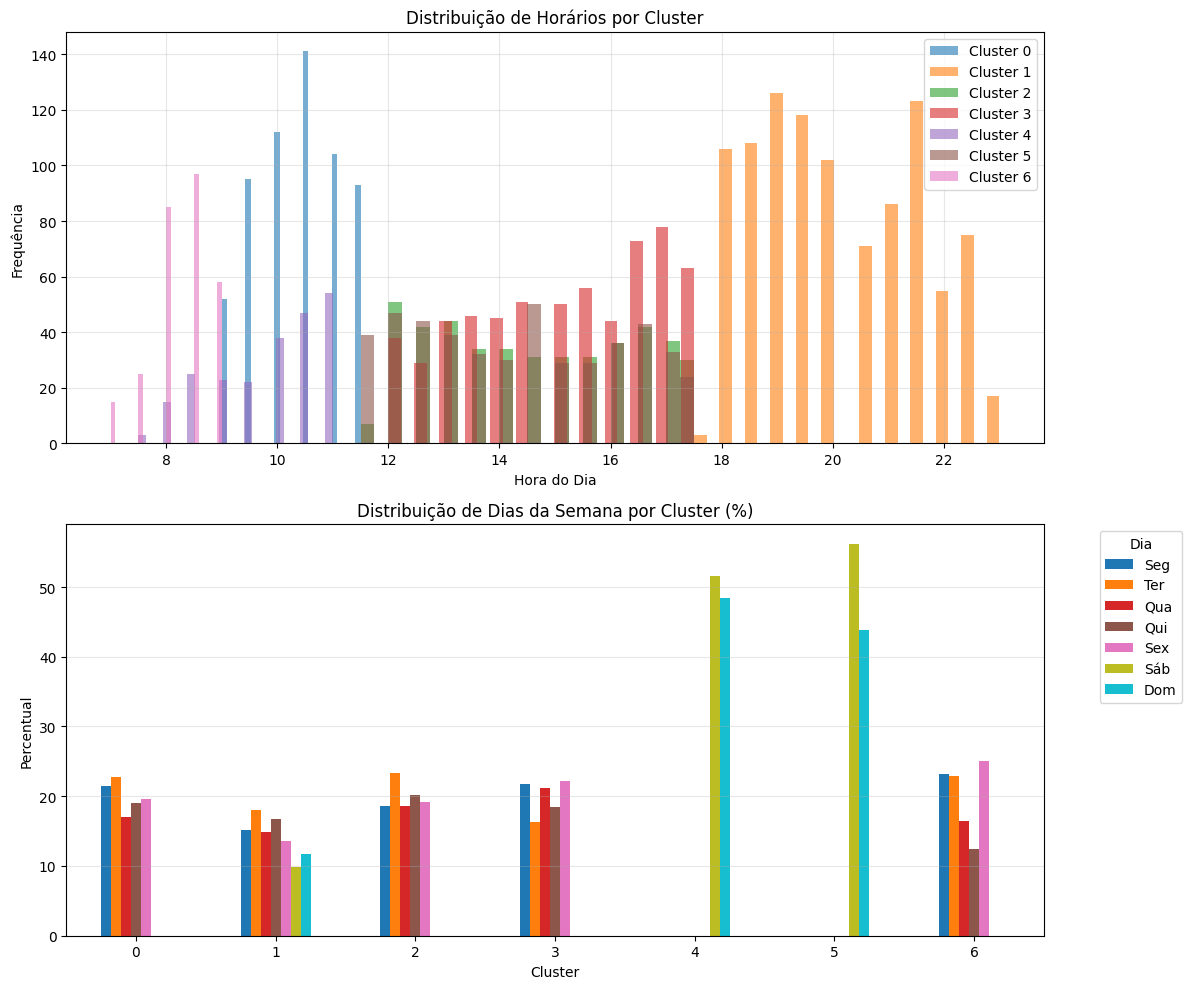

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]['hour_float_30min']
    axes[0].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster_id}', bins=24)

axes[0].set_xlabel('Hora do Dia')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição de Horários por Cluster')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

day_cluster = pd.crosstab(df['cluster'], df['day_of_week'], normalize='index') * 100
day_names = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
day_cluster.columns = day_names
day_cluster.plot(kind='bar', ax=axes[1], colormap='tab10')
axes[1].set_title('Distribuição de Dias da Semana por Cluster (%)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Percentual')
axes[1].legend(title='Dia', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [21]:
print("=" * 60)
print("PERFIS DOS CLUSTERS")
print("=" * 60)

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    
    print(f"\n📊 CLUSTER {cluster_id} ({len(cluster_data)} transações - {len(cluster_data)/len(df)*100:.1f}%)")
    print("-" * 60)
    
    # Horário médio
    avg_hour = cluster_data['hour_float_30min'].mean()
    print(f"⏰ Horário médio: {avg_hour:.1f}h")
    
    # Período do dia predominante
    periods = {
        'Manhã': cluster_data['is_morning'].mean(),
        'Tarde': cluster_data['is_afternoon'].mean(),
        'Noite': cluster_data['is_evening'].mean()
    }
    main_period = max(periods, key=periods.get)
    print(f"🌅 Período predominante: {main_period} ({periods[main_period]*100:.1f}%)")
    
    # Fim de semana
    weekend_pct = cluster_data['is_weekend'].mean() * 100
    print(f"📅 Fim de semana: {weekend_pct:.1f}%")
    
    # Clima mais comum
    weather_mode = cluster_data['weather'].mode()[0]
    weather_pct = (cluster_data['weather'] == weather_mode).mean() * 100
    print(f"🌤️  Clima predominante: {weather_mode} ({weather_pct:.1f}%)")
    
    # Café mais comum
    coffee_mode = cluster_data['coffee_name'].mode()[0]
    coffee_pct = (cluster_data['coffee_name'] == coffee_mode).mean() * 100
    print(f"☕ Café mais comum: {coffee_mode} ({coffee_pct:.1f}%)")
    
    # Tipo de pagamento
    cash_mode = cluster_data['cash_type'].mode()[0]
    cash_pct = (cluster_data['cash_type'] == cash_mode).mean() * 100
    print(f"💳 Pagamento predominante: {cash_mode} ({cash_pct:.1f}%)")

PERFIS DOS CLUSTERS

📊 CLUSTER 0 (597 transações - 16.4%)
------------------------------------------------------------
⏰ Horário médio: 10.4h
🌅 Período predominante: Manhã (84.4%)
📅 Fim de semana: 0.0%
🌤️  Clima predominante: sol (100.0%)
☕ Café mais comum: Americano with Milk (31.2%)
💳 Pagamento predominante: card (95.3%)

📊 CLUSTER 1 (990 transações - 27.2%)
------------------------------------------------------------
⏰ Horário médio: 20.1h
🌅 Período predominante: Noite (99.7%)
📅 Fim de semana: 21.6%
🌤️  Clima predominante: nublado (70.0%)
☕ Café mais comum: Latte (23.5%)
💳 Pagamento predominante: card (98.3%)

📊 CLUSTER 2 (450 transações - 12.4%)
------------------------------------------------------------
⏰ Horário médio: 14.5h
🌅 Período predominante: Tarde (91.8%)
📅 Fim de semana: 0.0%
🌤️  Clima predominante: sol (80.7%)
☕ Café mais comum: Latte (26.4%)
💳 Pagamento predominante: card (100.0%)

📊 CLUSTER 3 (617 transações - 17.0%)
---------------------------------------------------

In [22]:
# Calcular Silhouette Score final
final_silhouette = silhouette_score(X_processed, cluster_labels)
print(f"Silhouette Score final: {final_silhouette:.4f}")

# Análise de estabilidade (testar com diferentes seeds)
print("\n" + "=" * 60)
print("TESTE DE ESTABILIDADE (diferentes seeds)")
print("=" * 60)

stability_scores = []
for seed in [42, 123, 456, 789, 999]:
    kmeans_test = KMeans(n_clusters=k_optimal, random_state=seed, n_init=10)
    labels_test = kmeans_test.fit_predict(X_processed)
    score_test = silhouette_score(X_processed, labels_test)
    stability_scores.append(score_test)
    print(f"Seed {seed}: Silhouette Score = {score_test:.4f}")

print(f"\nMédia: {np.mean(stability_scores):.4f}")
print(f"Desvio padrão: {np.std(stability_scores):.4f}")

print("\n" + "=" * 60)
print("PRÓXIMOS PASSOS SUGERIDOS:")
print("=" * 60)
print("1. Testar DBSCAN para comparar resultados")
print("2. Criar features agregadas por cliente (se houver ID)")
print("3. Aplicar t-SNE para visualização alternativa")
print("4. Validar clusters com análise de negócio")
print("5. Exportar resultados para análise de marketing")

Silhouette Score final: 0.3246

TESTE DE ESTABILIDADE (diferentes seeds)
Seed 42: Silhouette Score = 0.3246
Seed 123: Silhouette Score = 0.3247
Seed 456: Silhouette Score = 0.3247
Seed 789: Silhouette Score = 0.3007
Seed 999: Silhouette Score = 0.3247

Média: 0.3199
Desvio padrão: 0.0096

PRÓXIMOS PASSOS SUGERIDOS:
1. Testar DBSCAN para comparar resultados
2. Criar features agregadas por cliente (se houver ID)
3. Aplicar t-SNE para visualização alternativa
4. Validar clusters com análise de negócio
5. Exportar resultados para análise de marketing
